In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers, optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix
import os
import statistics
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

Using TensorFlow backend.


In [2]:
benign_path = '/home/sdsra/Downloads/CTU-Dataset/benign'
benign_datas = pd.DataFrame()
sub_dir_list = os.listdir(benign_path)
for dir in sub_dir_list:
    tmp_data = pd.read_pickle(benign_path + '/' + dir + '/datas-by-origin-tool.pkl')
    benign_datas = pd.concat([benign_datas, tmp_data], ignore_index=True)

In [3]:
malware_path = '/home/sdsra/Downloads/CTU-Dataset/malware-2' 
malware_datas = pd.DataFrame()
for dir in os.listdir(malware_path) :
    pkl_path = malware_path +'/'+dir+'/datas-by-origin-tool.pkl'
    if os.path.exists(pkl_path):
        tmp_data = pd.read_pickle(pkl_path)
        malware_datas = pd.concat([malware_datas, tmp_data], ignore_index=True)

In [4]:
benign_datas['label'].value_counts()

benign    12971
Name: label, dtype: int64

In [19]:
benign_datas['is_malware'] = 0

In [20]:
malware_datas['is_malware'] = 1

In [21]:
datas = pd.concat([benign_datas, malware_datas], ignore_index=True)

In [22]:
numeric_columns = list(filter(lambda x: x not in ['src_ip','src_port','dst_ip','dst_port','proto', 'label'], benign_datas.columns))

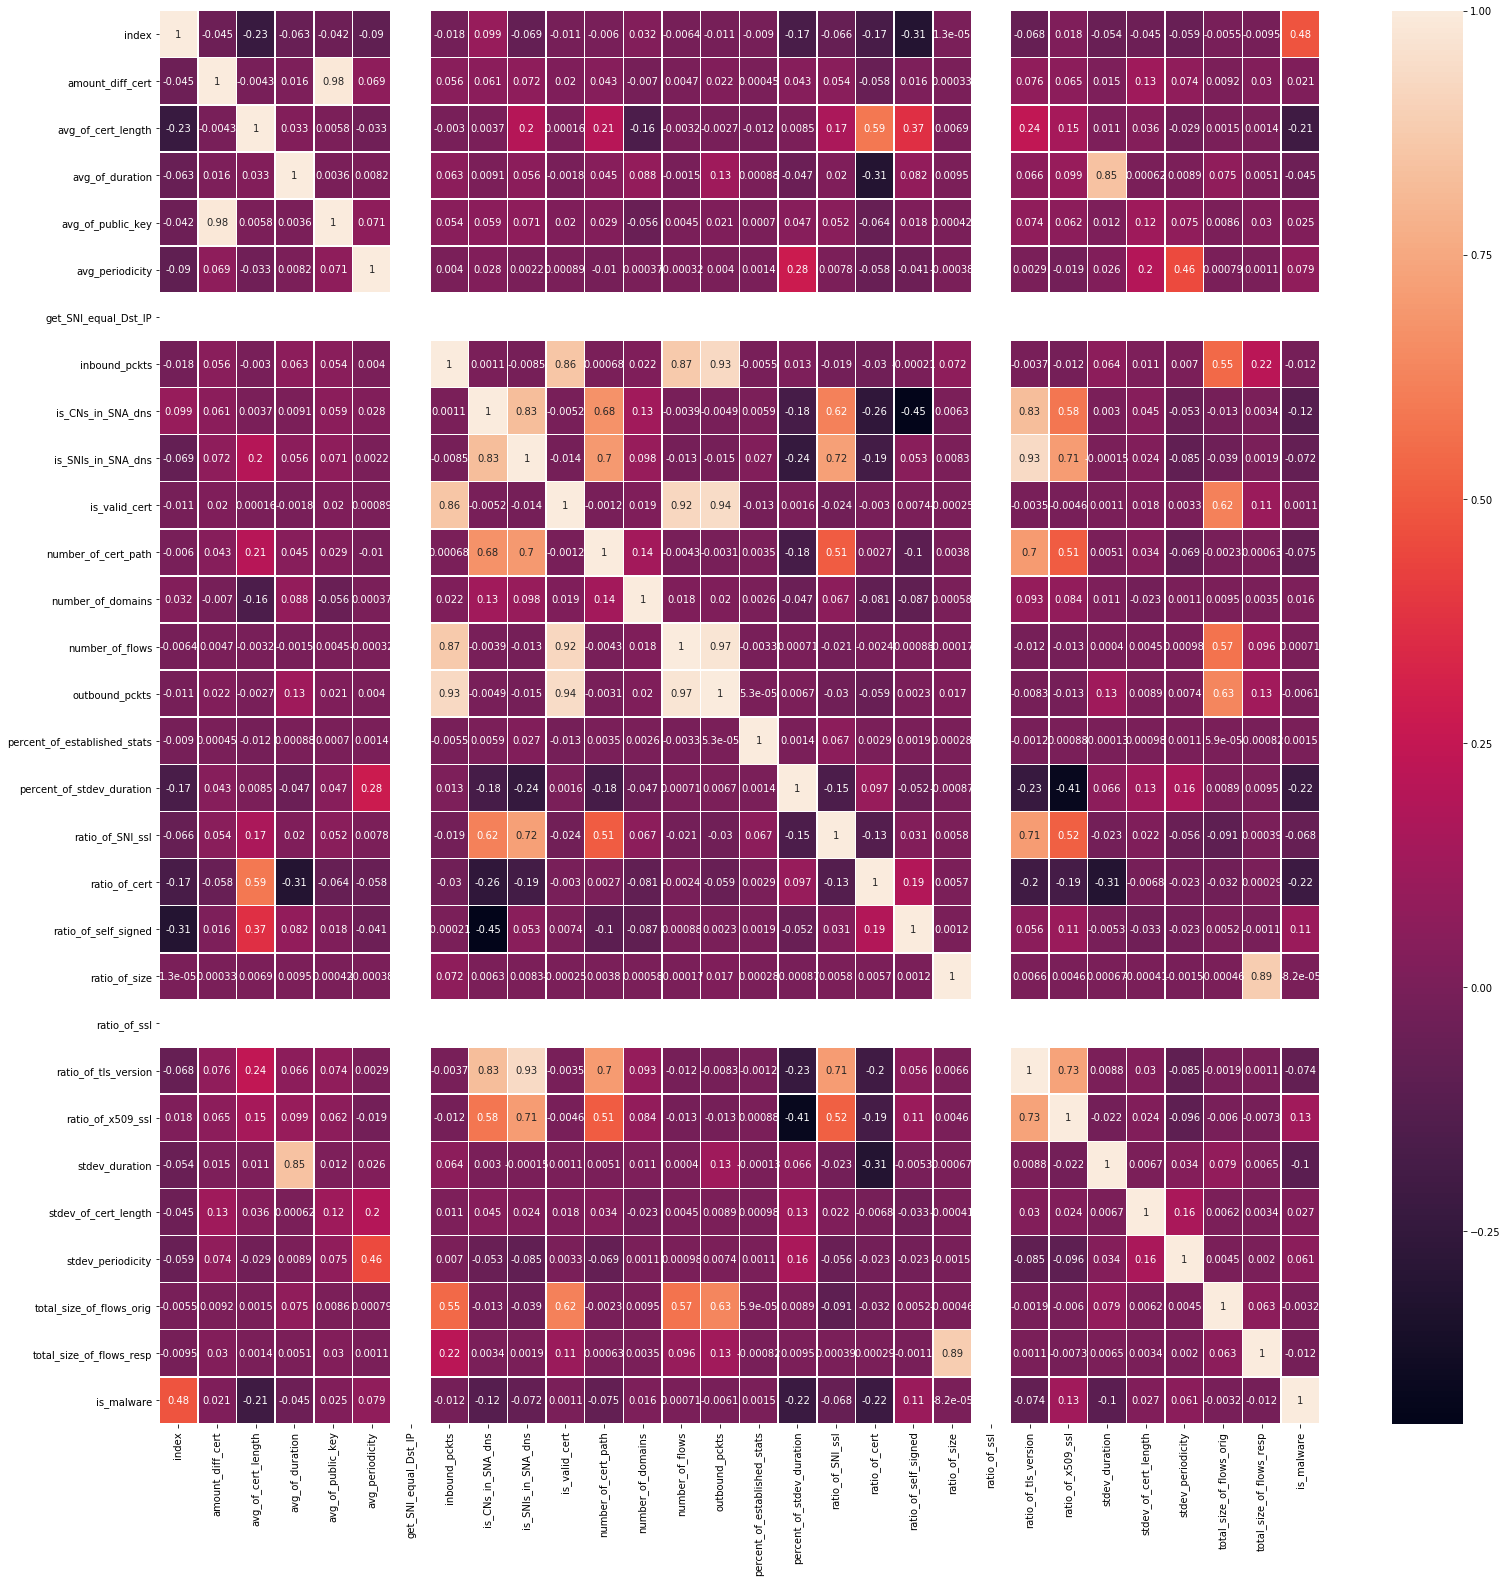

In [38]:
plt.figure(figsize=(26, 26))
sns.heatmap(datas.corr(), annot=True, linewidths=.5)